<a href="https://colab.research.google.com/github/umairchanna57/Deep-Learning/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets , layers, models

In [4]:
import matplotlib.pyplot as plt

In [6]:
(train_images , train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [7]:
train_images , test_images = train_images/255  , test_images/255

In [8]:
class_names = ['airplane' , 'automobile' , 'bird' , 'cat', 'deer' , 'dog'  , 'frog' , 'horse' , 'ship' , 'truck' , ]

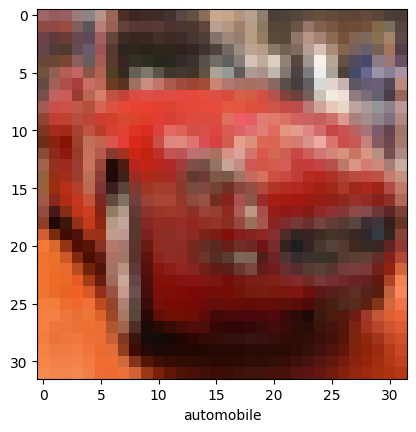

In [11]:
IMG_INDEX = 5
plt.imshow(train_images[IMG_INDEX])
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3) , activation='relu' , input_shape=(32,32 ,3 )))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3) , activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3) ,
                        activation='relu' ))


In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(10))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [22]:
model.compile(optimizer='adam' , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=['Accuracy'])

In [23]:
history = model.fit(train_images , train_labels , epochs=20 , validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5394 - Accuracy: 0.4360 - val_loss: 1.3038 - val_Accuracy: 0.5434
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1598 - Accuracy: 0.5903 - val_loss: 1.0798 - val_Accuracy: 0.6108
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0122 - Accuracy: 0.6448 - val_loss: 1.0929 - val_Accuracy: 0.6273
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9189 - Accuracy: 0.6804 - val_loss: 0.9961 - val_Accuracy: 0.6551
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8462 - Accuracy: 0.7065 - val_loss: 0.9179 - val_Accuracy: 0.6844
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7909 - Accuracy: 0.7241 - val_loss: 0.8864 - val_Accuracy: 0.6951
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7393 - Accuracy: 0.7409 - val_loss: 0.8861 - val_Accuracy

In [26]:
test_loss , test_acc = model.evaluate(test_images , test_labels  , verbose=2)

313/313 - 1s - loss: 1.1870 - Accuracy: 0.7022 - 962ms/epoch - 3ms/step


In [27]:
test_loss

1.186956524848938

In [28]:
test_acc

0.7021999955177307